In [46]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from pyclustering.cluster import kmedoids
from ckonlpy.tag import Twitter

# K-Means

In [72]:
twitter = Twitter()

location = 'D:/Analysis/BigData-PythonAnalysis-main/clustering_ex.csv'
df = pd.read_csv(location)

In [73]:
import re
desc = df['요약']
for i in range(len(desc)):
    desc[i] = re.sub('<b>|</b>|%quot','',desc[i])

print(desc)

0     공연은 크리스마스에 마주하는 이들과 함께, 인생에서 어쩌다 한번쯤은 그리고 내 인생...
1     크리스마스 시즌을 맞은 고객들을 위한 경품들이 마련됐으며, 8만여 개 브랜드가 참여...
2     고객은 크리스마스 또는 올해 마지막 날에 맞춰 22일과 28일 중에서 배송날짜를 선...
3     수입 매트리스 전문업체 '루모스'가 12월 한달간 미국 수입가구를 세일가에 선보이는...
4     아늑한 객실에서 휴식하며 소소한 활동으로 크리스마스를 준비하거나 한 해를 돌아볼 수...
                            ...                        
40    SK하이닉스 노조들이 유급 노조활동 시간에 관해 1년여간 논의를 이어 오고 있지만 ...
41    ▲삼성전자 SK하이닉스 메모리 반도체 업체들 비대면 수요 감소 전망 10월 이후 공...
42    이승우 유진투자증권 연구원은 &quot;외국인들은 최근 3주간 삼성전자와 SK하이닉...
43    실제 최근 SK하이닉스와 LG전자 등 대기업이 국민취업지원제도를 통해 제공한 일경험...
44    SK하이닉스는 ‘인사이드 아메리카’ 전략을 실행해 나갈 ‘미주사업’ 조직을 신설했고...
Name: 요약, Length: 45, dtype: object


In [74]:
contents = []

twitter.add_dictionary(['크리스마스','쇼미더머니','SK하이닉스'],'Noun')
for i in desc:
    contents.append(twitter.nouns(i))
text = [' '.join(contents[i]) for i in range(len(contents))]
print(text)

['공연 크리스마스 마 주하 이 인생 한번 쯤 고 내 인생 중요 음악 자리 잡고 트로트 이야기 음악 구성 날짜 별 연진 연하 하루하루 다른 내용', '크리스마스 시즌 고객 위 경품 마련 개 브랜드 참여 인기 상품 오전 시부 터 시간 동안 공식 앱 만원 이상 구 매하 모든 고객 대상 미니 트리 크리스마스', '고객 크리스마스 올해 마지막 날 일과 중 배송 날짜 선택 응모 수 당 첨자 개별 통보 예정 기아 개인 계정 쿠킹 클래스 후기 고객 중 명', '수입 매트리스 전문 업체 루 모스 달 미국 수입 가구 세 일가 선 보이 크리스마스 할인 행사 슈퍼 일 를 실시 중이 관계자 루 모스 슈퍼 일 이벤트 템퍼 프레임 등 미국 가구', '늑한 객실 휴식 소 소한 활동 크리스마스 준비 거나 해 수 상품 우선 크리스마스 분위기 리스 직접 수 윈터 블로썸 패키지', '포 크리스마스 이즈 유 를 시작 아리아나 데 산타 텔 시아 스노우맨 아이유 미리 메리 크리스마스 등 겨울 노래 차트 모습 계단', '완구 전문 기업 손오공 크리스마스 시즌 겨냥 바비 피아트500 자동차 세트 를 자동차 세트 엄마 딸 서로 취향 공유 수 특별 크리스마스 선물 것 전', '쿠팡 달 까지 크리스마스 관련 모든 상품 곳 크리스마스 전 문관 운영 사진 쿠팡 이번 행사 홈파티 소품 홈파티 준비 크리스마스 선물 등 카테고리 구성', '크리스마스 인테리어 위 생활 장르 년 신장 연말 선물 도 각광 우선 신세계 운 영하 라이프스타일 편집 매장 피숀 은 크리스마스 겨냥 시즌 한정 홈', '이번 이벤트 크리스마스 기념 이벤트 청호 커피 머신 얼음 정수기 에스 프레 카페 관련 퀴즈 두 가지 먼저 크리스마스 기념 이벤트 일부 터 까지 진행 청호나이스 공식 인스타그램 채널 통해', '한편 라포 엠 예술 전당 토월 극장 팬 크리스마스 팬 콘서트 라데 오브 라포 엠 비롯 가오 단독 콘서트 준비 중이', '장 카스 텍스 프랑스 총리 날 현 방역 조치 관련 현재 백신 접종 대상자 인 약 백신 차례 이상 접종 때문 코로나 초기 발병

In [75]:
vectorize = CountVectorizer()
x = vectorize.fit_transform(text)

In [76]:
#데이터프레임 생성(문장 단어 매트릭스)
new_df = pd.DataFrame(x.toarray(),columns=vectorize.get_feature_names_out())

kmeans = KMeans(n_clusters=3).fit(new_df)
print('[K-평균 군집 분석 결과]')
print('###############')
print(kmeans.labels_)

[K-평균 군집 분석 결과]
###############
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [77]:
df['ids'] = kmeans.labels_

In [79]:
df.head()

,검색어,제목,요약,링크,ids
0,크리스마스,"내 인생의 '트로트' 이야기, 콘서트 '어쩌다 마주친 트로트'","공연은 크리스마스에 마주하는 이들과 함께, 인생에서 어쩌다 한번쯤은 그리고 내 인생...",http://www.mhns.co.kr/news/articleView.html?id...,2
1,크리스마스,"LF 하프클럽, '하프데이' 열고 풍성한 혜택까지","크리스마스 시즌을 맞은 고객들을 위한 경품들이 마련됐으며, 8만여 개 브랜드가 참여...",http://www.whitepaper.co.kr/news/articleView.h...,2
2,크리스마스,"기아, THE K9 멤버십 고객 대상 '비대면 쿠킹 클래스' 시행",고객은 크리스마스 또는 올해 마지막 날에 맞춰 22일과 28일 중에서 배송날짜를 선...,https://www.etoday.co.kr/news/view/2084725,2
3,크리스마스,"[소비이슈] '루모스' 템퍼프레임, 12월 <b>크리스마스</b> 할인행사 진행",수입 매트리스 전문업체 '루모스'가 12월 한달간 미국 수입가구를 세일가에 선보이는...,http://www.sisunnews.co.kr/news/articleView.ht...,2
4,크리스마스,"서울신라호텔, 겨울 감성 담은 힐링 패키지 출시",아늑한 객실에서 휴식하며 소소한 활동으로 크리스마스를 준비하거나 한 해를 돌아볼 수...,https://www.etoday.co.kr/news/view/2084726,2


# K대푯값

In [81]:
kmedoids_ins = kmedoids.kmedoids(new_df.values,initial_index_medoids = [4,18,36])
kmedoids_ins.process()
clusters = kmedoids_ins.get_clusters()
print('##################')
print('K-대푯값 군집 분석 결과')
print(clusters)
# 각 괄호 안의 행들이 하나의 cluster로 묶인 것

##################
K-대푯값 군집 분석 결과
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], [16, 18], [17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]


# PCA로 군집 시각화

In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [83]:
pca = PCA(n_components=2)
pc = pca.fit_transform(new_df)
p_df = pd.DataFrame(data=pc,columns = ['main1','main2'])
p_df.index=df['검색어']

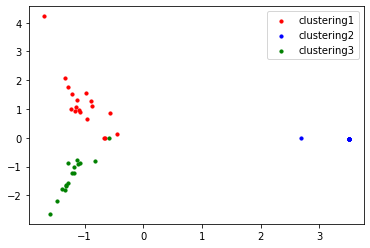

In [85]:
plt.scatter(p_df.iloc[kmeans.labels_ == 0,0],
            p_df.iloc[kmeans.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[kmeans.labels_ == 1,0],
            p_df.iloc[kmeans.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')
plt.scatter(p_df.iloc[kmeans.labels_ == 2,0],
            p_df.iloc[kmeans.labels_ == 2,1], s = 10, c = 'green', label = 'clustering3')

plt.legend()
plt.show()